# 最もシンプルなトレードルール

input:現在の日付、所持金、取り扱いデータ（dataframe）<br>
output:更新された所持金<br>

In [59]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [60]:
#パラメータ
current_day = '2021-06-07'
posses = {'JPY':10000,'USD':0}
jpy_usd = pd.read_csv('../temp_data/jpy_usd.csv')

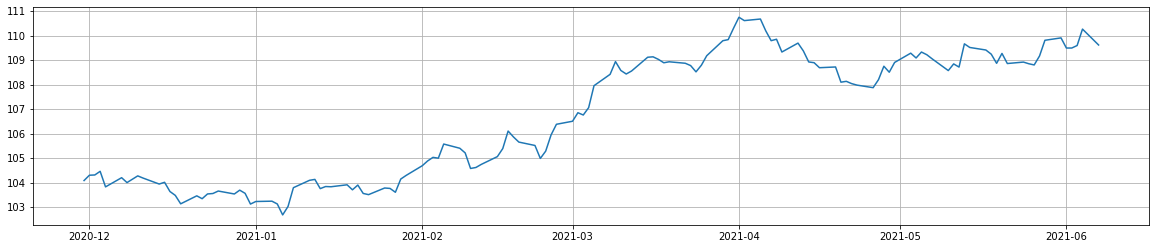

In [61]:
jpy_usd.index = pd.to_datetime(jpy_usd['Date'])
del jpy_usd['Date']
jpy_usd = jpy_usd[:current_day]
plt.figure(figsize=(20,4))
plt.plot(jpy_usd['Close'])
plt.grid()
plt.show()

In [62]:
def ema(s, term=5):
    '''指数平滑移動平均の計算'''
    sma = s.rolling(term).mean()[:term]
    return pd.concat([sma, s[term:]]).ewm(span=term, adjust=False).mean()

def calc_macd(s,short_term=12,long_term=26, signal_term=9):
    """
    s: pd.Series、為替データ
    return: macd,macd_signal
    """
    short_term_ema = ema(s,short_term)
    long_term_ema = ema(s,long_term)
    macd = short_term_ema - long_term_ema
    macd_signal = ema(macd,signal_term)
    return macd,macd_signal

def out_cross_flag(macd,macd_signal):

    cross_list = []
    be_flag = 0
    af_flag = 0
    for i in range(len(macd)):

        #欠損値でないなら
        if ~np.isnan(macd[i]):
            #どちらが上かによるフラグ
            if macd[i] <= macd_signal[i]:
                af_flag = 0
            else:
                af_flag = 1

            #一つ前のフラグより大きい小さいがあればクロス
            if be_flag < af_flag:
                cross_list.append('gold')
            elif be_flag > af_flag:
                cross_list.append('dead')
            else:
                cross_list.append(0)
        else:
            cross_list.append(np.nan)

        #フラグ更新
        be_flag = af_flag
    return pd.Series(cross_list,index=macd.index)

#MACDの計算
macd,macd_signal = calc_macd(jpy_usd['Close'],short_term=12,long_term=26,signal_term=9)
jpy_usd['macd_flag'] = out_cross_flag(macd,macd_signal)

In [76]:
jpy_usd['2021-01-01':].head(50)

,Open,High,Low,Close,Adj Close,Volume,macd_flag
Date,,,,,,,
2021-01-01,103.225998,103.250000,103.225998,103.225998,103.225998,0,0
2021-01-04,103.244003,103.244003,102.709999,103.238998,103.238998,0,0
2021-01-05,103.141998,103.180000,102.671997,103.125000,103.125000,0,0
2021-01-06,102.699997,103.431000,102.589996,102.678001,102.678001,0,0
2021-01-07,103.028000,103.950996,102.956001,103.024002,103.024002,0,0
2021-01-08,103.794998,104.078003,103.616997,103.790001,103.790001,0,gold
2021-01-11,104.072998,104.389000,104.037003,104.091003,104.091003,0,0
2021-01-12,104.132004,104.319000,104.089996,104.127998,104.127998,0,0
2021-01-13,103.748001,103.987999,103.540001,103.751999,103.751999,0,0


In [72]:
today = jpy_usd.iloc[-1,:]

In [73]:
#trading rule
if today['macd_flag'] == 'gold':
    posses['USD'] += posses['JPY']*0.1/today['Close']
    posses['JPY'] = posses['JPY']*0.9
elif today['macd_flag'] == 'dead':
    posses['JPY'] += posses['USD']*today['Close']
    posses['USD'] = 0

In [74]:
posses

{'JPY': 10000, 'USD': 0}